# Day 2 Visualisations

In [100]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [102]:
df= pd.read_csv(r"C:\Users\house\Downloads\HR-Employee-Attrition.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## Univariate Distribution

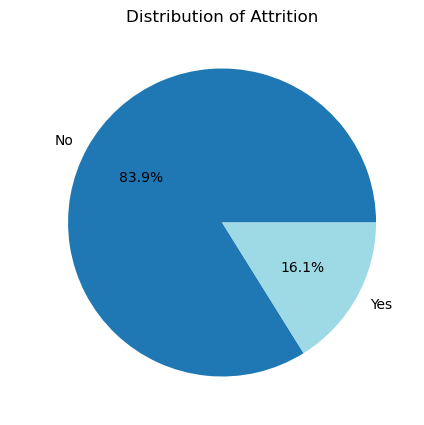

In [10]:
plt.figure(figsize=(5,5))
df['Attrition'].value_counts().plot.pie( autopct='%1.1f%%', cmap='tab20', ylabel= ' ')
plt.title('Distribution of Attrition')
plt.show();

-Like the bar chart in the 01 Notebook, this pie chart illustrates the imbalanced distribution of our target. This creates an automatic bias in ML models. If the model merely chose no attrition, 84% of the time, the accuracy would be very strong, but the model would tell very little about who is likely to leave. 

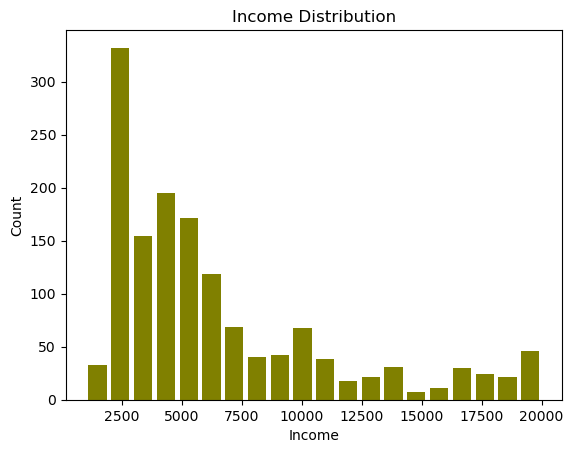

In [9]:
plt.hist(df['MonthlyIncome'], bins=20, color='olive', rwidth= 0.8)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

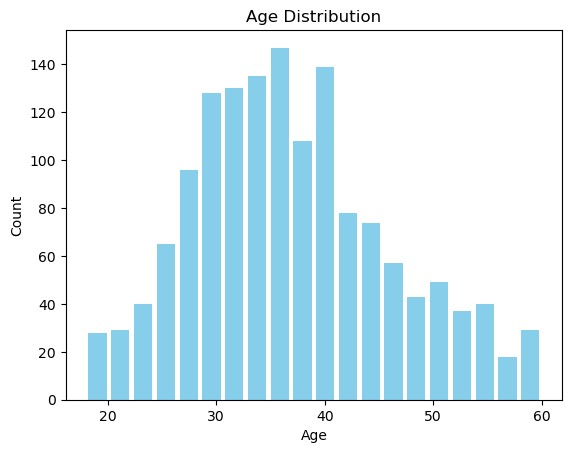

In [11]:
plt.hist(df['Age'], bins=20, color='skyblue', rwidth= 0.8)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

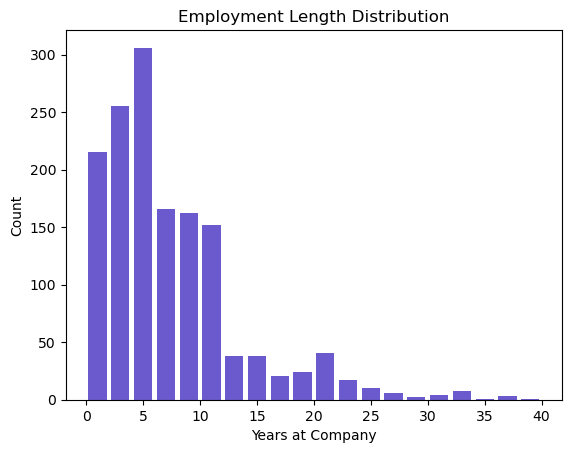

In [13]:
plt.hist(df['YearsAtCompany'], bins=20, color='slateblue', rwidth= 0.8)
plt.title("Employment Length Distribution")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()

-*Income* and *Employment Length* both show right-skewed distributions. Whereas *Age* shows a slightly more normal distribution, with its peaks in the 30s.

## Bivariate Relationships

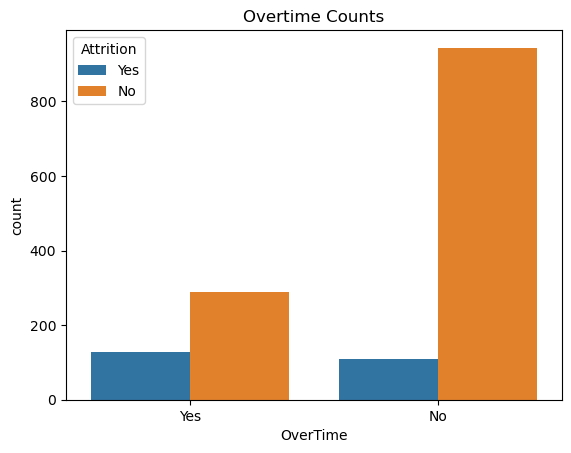

In [68]:
sns.countplot(x= 'OverTime', hue= 'Attrition', data=df) 
plt.title('Overtime Counts')
plt.show();

In [30]:
ot_table = pd.crosstab(df['OverTime'], df['Attrition'])

ot_table['Total'] = ot_table.sum(axis=1)

ot_table['AttritionRate'] = (ot_table['Yes'] / ot_table['Total']) * 100
ot_table

Attrition,No,Yes,Total,AttritionRate
OverTime,,,,
No,944,110,1054,10.436433
Yes,289,127,416,30.528846


### Overtime and Attrition

Although the absolute number of employees who left is similar between overtime and non overtime, the *rates* tell a different story.

- About **31%** of employees who work overtime leave the company.
- Only about **10%** of employees who do not work overtime leave.

This shows that overtime is strongly associated with higher attrition risk, even if the raw counts appear similar. Workload stress is likely a contributing factor.


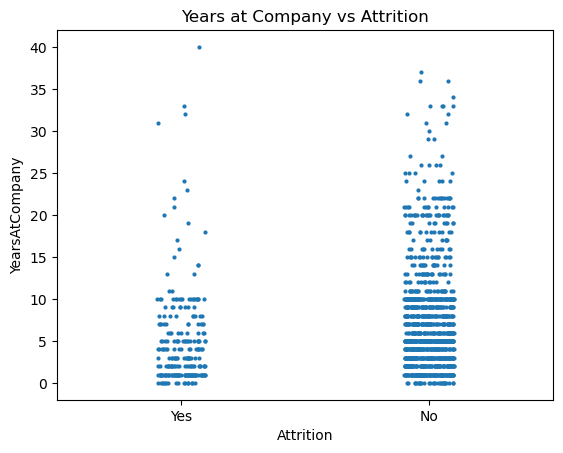

In [34]:
sns.stripplot(x='Attrition', y='YearsAtCompany', data=df, size =3)
plt.title("Years at Company vs Attrition")
plt.show()

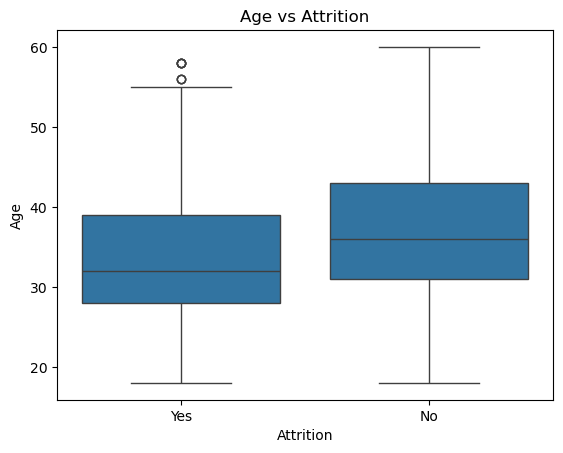

In [19]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()

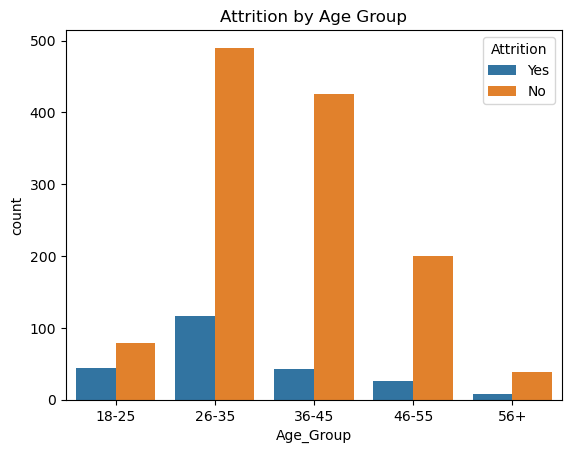

In [104]:
# Age Groups
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[17, 25, 35, 45, 55, 70],
    labels=['18-25','26-35','36-45','46-55','56+']
)

sns.countplot(x='Age_Group', hue='Attrition', data=df)
plt.title("Attrition by Age Group")
plt.show()

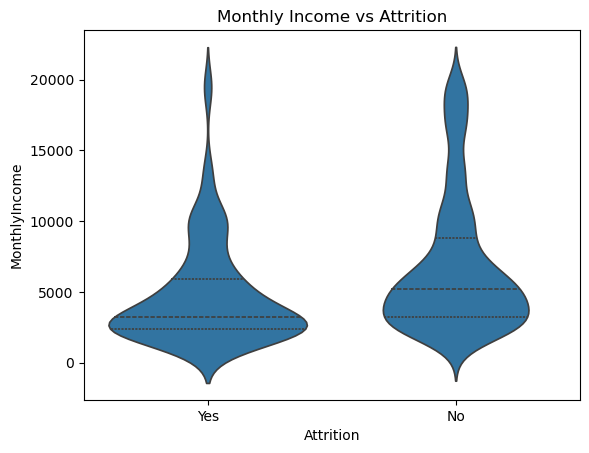

In [21]:
sns.violinplot(x='Attrition', y='MonthlyIncome', inner= 'quartile', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

-Some key takeaways:
*Lower income*, *less time in the company*, and a *younger age* are all factors which tend to leave more. These are logically highly likely to be related to each other. Even without the question of attrition, a younger person, will have worked for the company less and have earned less. Interesting to see what other factors might play a role.

## Ordinal features and their role

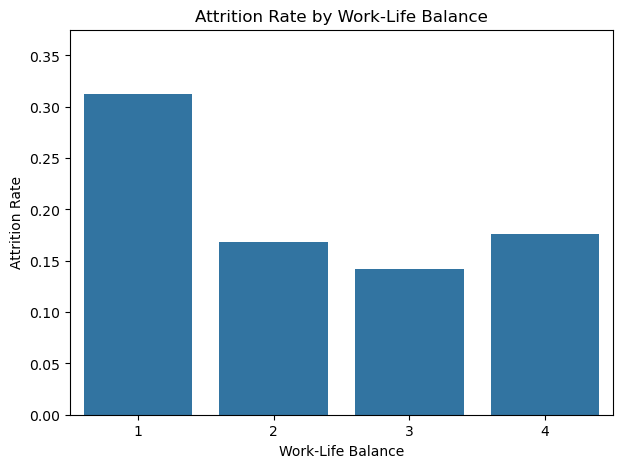

In [73]:
attrition_rate = (
    df.groupby('WorkLifeBalance')['Attrition']
      .apply(lambda x: (x=='Yes').mean())
      .reset_index(name='Attrition_Rate')
)

plt.figure(figsize=(7,5))
sns.barplot(
    data=attrition_rate,
    x='WorkLifeBalance',
    y='Attrition_Rate'
)
plt.title("Attrition Rate by Work-Life Balance")
plt.xlabel("Work-Life Balance")
plt.ylabel("Attrition Rate")
plt.ylim(0, attrition_rate['Attrition_Rate'].max() * 1.2)

plt.show()

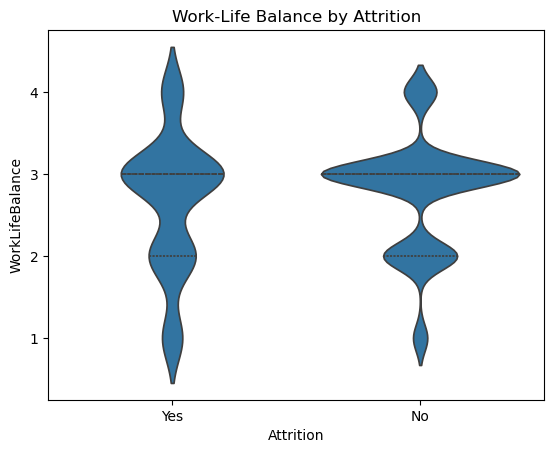

In [42]:
sns.violinplot(x='Attrition', y='WorkLifeBalance', data=df, inner= 'quartile')

plt.title("Work-Life Balance by Attrition")
plt.show()

-The raw counts in the violin plots are fine, i.e. most people give their work-life Balance a 3 ('Better') but the rates of attrition for each rating in the barplot tells us much more. A person with a *Bad* work life balance (1) is about 30% likely to leave.  

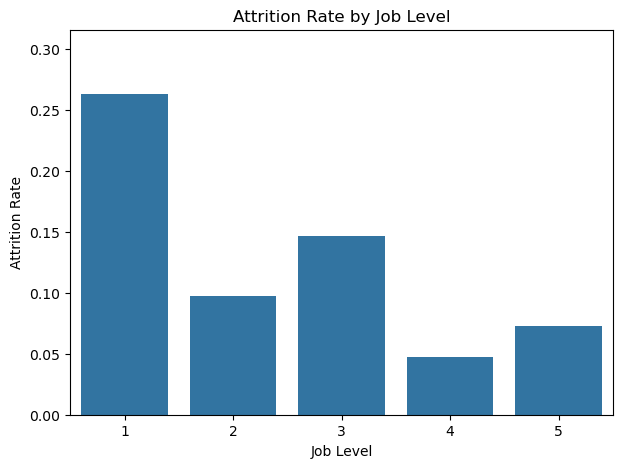

In [27]:
attrition_rate = (
    df.groupby('JobLevel')['Attrition']
      .apply(lambda x: (x=='Yes').mean())
      .reset_index(name='Attrition_Rate')
)

plt.figure(figsize=(7,5))
sns.barplot(
    data=attrition_rate,
    x='JobLevel',
    y='Attrition_Rate'
)

plt.title("Attrition Rate by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Attrition Rate")
plt.ylim(0, attrition_rate['Attrition_Rate'].max() * 1.2)

plt.show()

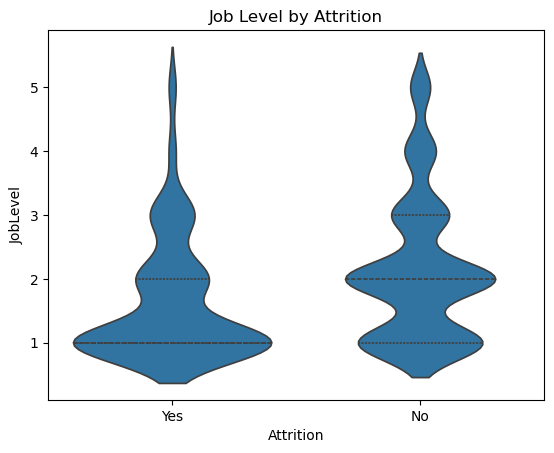

In [46]:
sns.violinplot(x='Attrition', y='JobLevel', data=df, inner= 'quartile')
plt.title("Job Level by Attrition")
plt.show()

-In this case the raw counts and rates align more closely, many employees leave in lower levels jobs. However the two lower levels, (1&2) make up a majority of the employees.

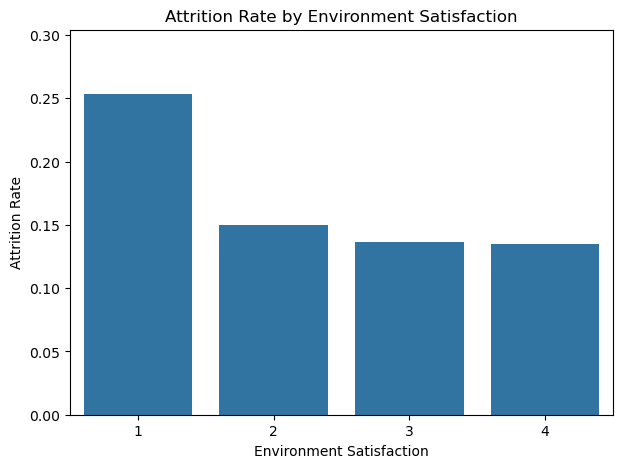

In [31]:
attrition_rate = (
    df.groupby('EnvironmentSatisfaction')['Attrition']
      .apply(lambda x: (x=='Yes').mean())
      .reset_index(name='Attrition_Rate')
)

plt.figure(figsize=(7,5))
sns.barplot(
    data=attrition_rate,
    x='EnvironmentSatisfaction',
    y='Attrition_Rate'
)

plt.title("Attrition Rate by Environment Satisfaction")
plt.xlabel("Environment Satisfaction")
plt.ylabel("Attrition Rate")
plt.ylim(0, attrition_rate['Attrition_Rate'].max() * 1.2)

plt.show()

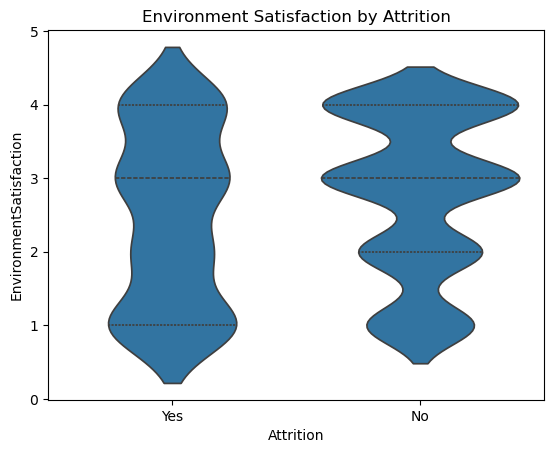

In [51]:
sns.violinplot(x='Attrition', y='EnvironmentSatisfaction', data=df, inner= 'quartile')

plt.title("Environment Satisfaction by Attrition")
plt.show()

-Low levels of satisfaction leads to higher levels of attrition (25%). However, the largest distribution centers around the highly satisfied environments of 4 & 5, who do not leave.

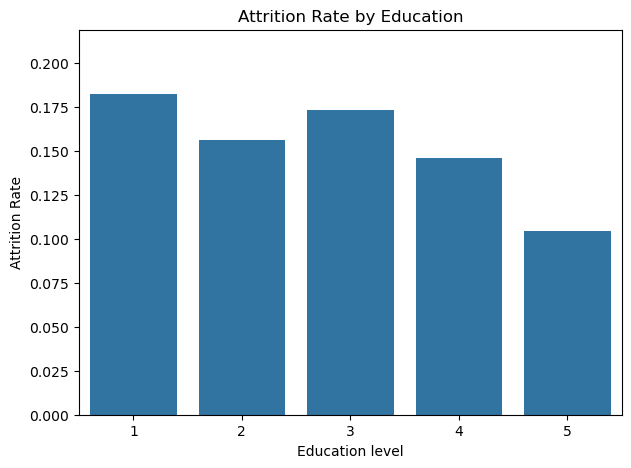

In [35]:
attrition_rate = (
    df.groupby('Education')['Attrition']
      .apply(lambda x: (x=='Yes').mean())
      .reset_index(name='Attrition_Rate')
)

plt.figure(figsize=(7,5))
sns.barplot(
    data=attrition_rate,
    x='Education',
    y='Attrition_Rate'
)

plt.title("Attrition Rate by Education")
plt.xlabel("Education level")
plt.ylabel("Attrition Rate")
plt.ylim(0, attrition_rate['Attrition_Rate'].max() * 1.2)

plt.show()

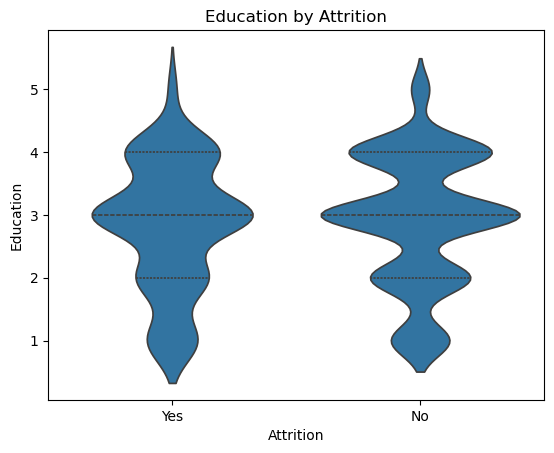

In [54]:
sns.violinplot( x='Attrition', y='Education', data=df, inner= 'quartile')
plt.title("Education by Attrition")
plt.show()

-Education level show less of a clear relationship with attrition. One can easily surmise how being in the middle of education levels, might also involve leaving the company to put your education elsewhere.

## Job Title and Departments Counts vs. Attrition Rates

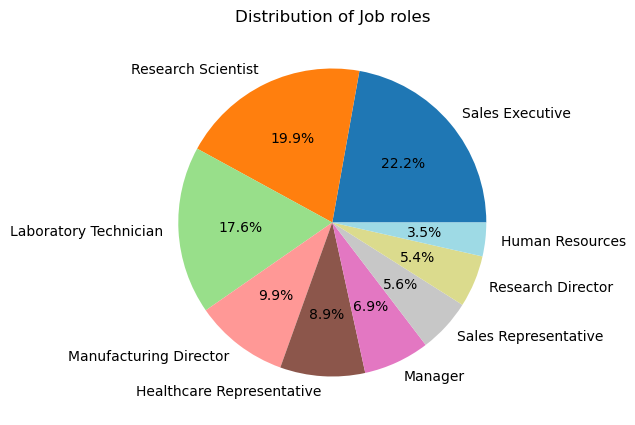

In [5]:
plt.figure(figsize=(5,5))
df['JobRole'].value_counts().plot.pie( autopct='%1.1f%%', cmap='tab20', ylabel= ' ')
plt.title('Distribution of Job roles')
plt.show();

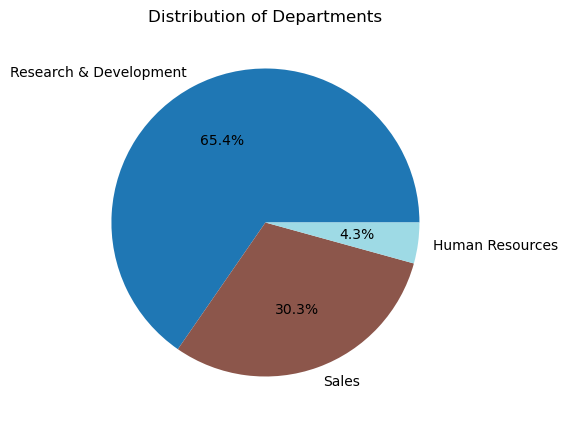

In [57]:
plt.figure(figsize=(5,5))
df['Department'].value_counts().plot.pie( autopct='%1.1f%%', cmap='tab20', ylabel= ' ')
plt.title('Distribution of Departments')
plt.show();

-A quick overview of *Departments* and *Roles* show that even though, by and large *Research and Development* is that largest department, the largest Job title is in fact *Sales Executive*, with nearly a quarter of all employees. Below a quick crosstab table shows us that even though *Research Scientist* follows second in the Job distribution, it has a rather low 16% attrition rate compared to the 40% of a Sales Rep.

-The bar graphs below illustrate the Attrition **counts** versus **rates** in jobs more.

-So it seems clear the workforce has an uneven distribution across roles, where some departments may expect a different workload, or stress level. 

In [82]:
ot_table2 = pd.crosstab(df['JobRole'], df['Attrition'])

ot_table2['Total'] = ot_table2.sum(axis=1)

ot_table2['AttritionRate'] = (ot_table2['Yes'] / ot_table2['Total']) * 100
ot_table2

Attrition,No,Yes,Total,AttritionRate
JobRole,,,,
Healthcare Representative,122,9,131,6.870229
Human Resources,40,12,52,23.076923
Laboratory Technician,197,62,259,23.938224
Manager,97,5,102,4.901961
Manufacturing Director,135,10,145,6.896552
Research Director,78,2,80,2.500000
Research Scientist,245,47,292,16.095890
Sales Executive,269,57,326,17.484663
Sales Representative,50,33,83,39.759036


Top 5 Job Roles:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Name: count, dtype: int64


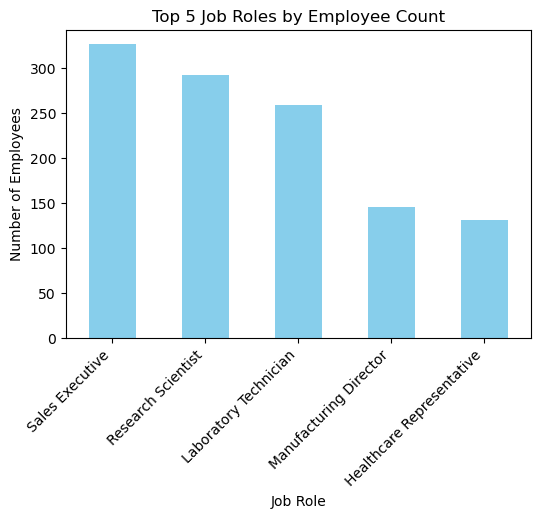

In [42]:
job_counts = df['JobRole'].value_counts()
print("Top 5 Job Roles:")
print(job_counts.head(5))

job_counts.head(5).plot(kind='bar', figsize=(6,4), color='skyblue')
plt.title("Top 5 Job Roles by Employee Count")
plt.ylabel("Number of Employees")
plt.xlabel("Job Role")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\house\AppData\Local\Temp\ipykernel_11980\3936700243.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


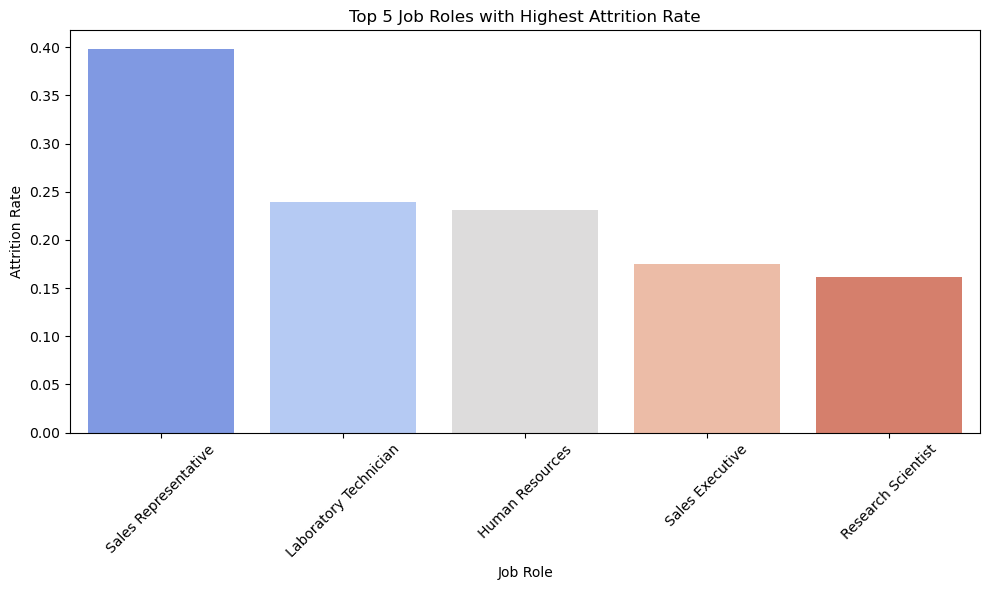

In [85]:
job_counts = (
    df.groupby('JobRole')['Attrition']
      .apply(lambda x: (x=='Yes').mean())
      .sort_values(ascending=False)
      .reset_index(name='Attrition_Rate')
      .head(5)
)
plt.figure(figsize=(10,6))
sns.barplot(
    data=job_counts,
    x='JobRole',
    y='Attrition_Rate',
    palette='coolwarm'
)
plt.title("Top 5 Job Roles with Highest Attrition Rate")
plt.ylabel("Attrition Rate")
plt.xlabel("Job Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


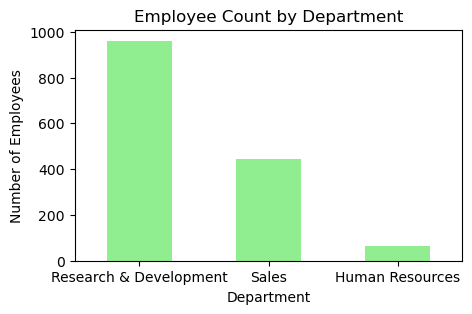

In [53]:

dept_counts.plot(kind='bar', figsize=(5,3), color='lightgreen')
plt.title("Employee Count by Department")
plt.ylabel("Number of Employees")
plt.xlabel("Department")
plt.xticks(rotation=0)
plt.show()

C:\Users\house\AppData\Local\Temp\ipykernel_4792\3355688119.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


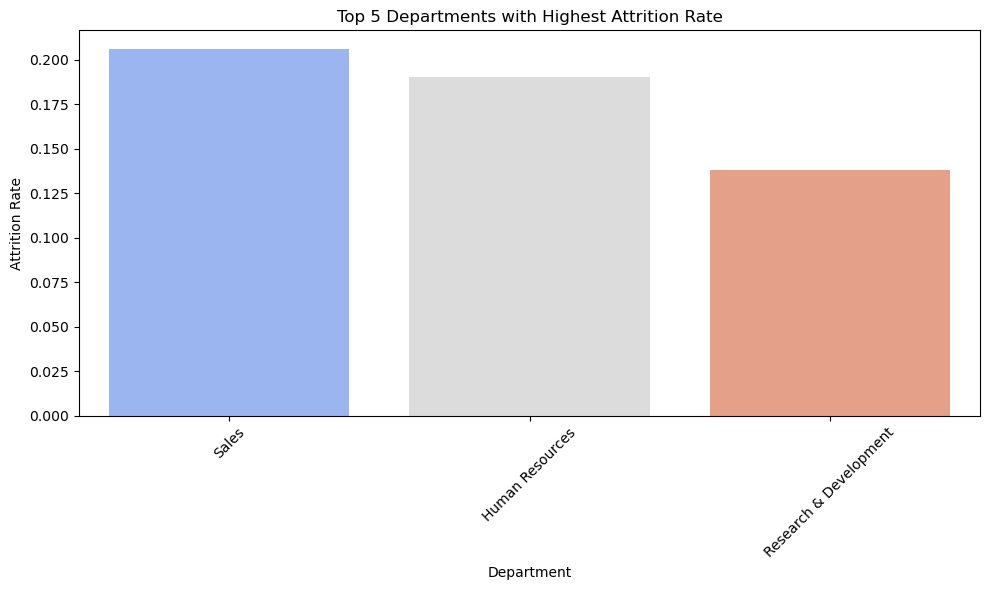

In [55]:
dpt_counts = (
    df.groupby('Department')['Attrition']
      .apply(lambda x: (x=='Yes').mean())
      .sort_values(ascending=False)
      .reset_index(name='Attrition_Rate')
      .head(5)
)
plt.figure(figsize=(10,6))
sns.barplot(
    data=dpt_counts,
    x='Department',
    y='Attrition_Rate',
    palette='coolwarm'
)

plt.title("Top 5 Departments with Highest Attrition Rate")
plt.ylabel("Attrition Rate")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Heatmap

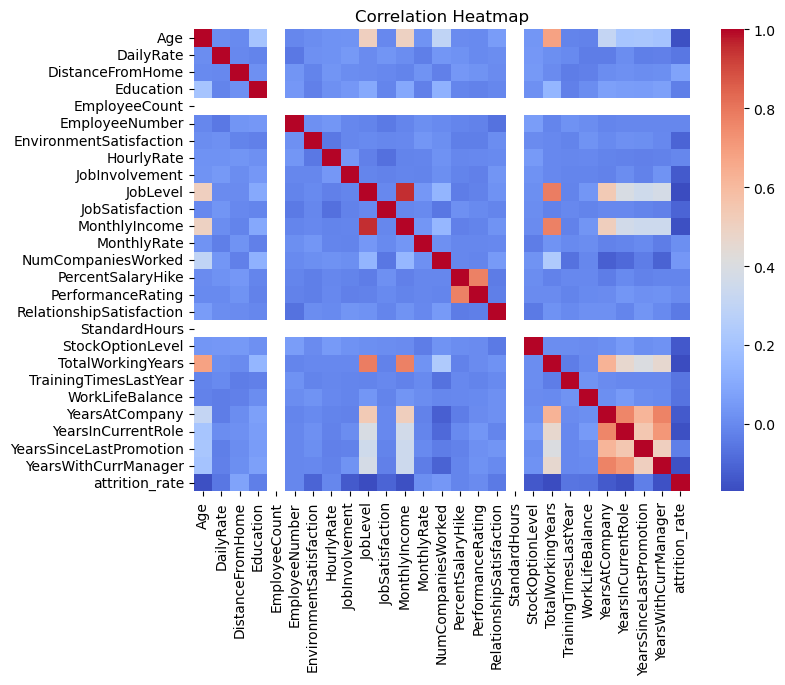

In [92]:
df ['attrition_rate'] = df['Attrition'].apply(lambda x: 1 if x== 'Yes' else 0)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

-The categorical columns (rating job satisfaction, etc), were left as numerals but did not reveal anything of value.

-*Monthly Income* and *Working Years* are (logically) closely correlated.

-Attrition rate has abolutely no real, direct correlations, rather is influenced by a complex set of factors. Hence a non-linear ML model, like Decision-Tree is expected to make better predictions.
  

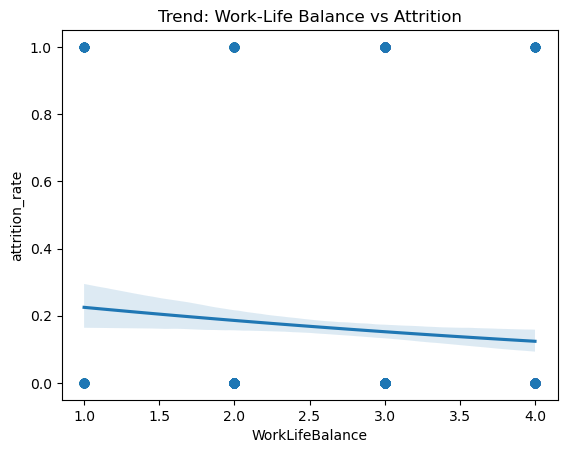

In [59]:
sns.regplot(
    data=df,
    x='WorkLifeBalance',
    y='attrition_rate',
    logistic=True
)
plt.title("Trend: Work-Life Balance vs Attrition")
plt.show()

-As work life balance improves, the rate of attritions lowers slightly. (Small Linear relationship)

## Summary EDA Takeaways
Most of the data was what logically´would be anticipated, i.e. clusters around salary, working years and seniority level. Even the attrition rate was nothing irregular. The only slightly surprising element was the incontinuity between department, role and attrition. 
- Workforce is uneven in regards to roles and departments, which may influence attrition.
- Attrition is imbalance and needs to be weighted in the next step.
- Small rises in attrion with those just beginning their career, those who work overtime, those in sales, and low work-life balance.
- Evidence of non-linear attrition relationships.
- New categories in the next step might help tease out some of the relationship between stress and attrition.

__Next:__ Encode features, scale numerics, handle imbalance, and prepare data for modeling.